# Machine Learning Modelling Experiments

## Experiment Setup

In [1]:
# Setting up execution path
import os

print(f"Current working directory: {os.path.basename(os.getcwd())}")

# Change to root directory
os.chdir("../")
print(f"Current working directory (Changed): {os.path.basename(os.getcwd())}")

Current working directory: notebooks
Current working directory (Changed): Ecommerce-Customer-Analysis


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# module setup
%matplotlib inline
pd.options.display.precision = 3
warnings.filterwarnings("ignore")

In [3]:
from os.path import normpath

In [34]:
# Function imports
from src.constants import CONFIGS, SCHEMA
from src.utils.basic_utils import read_yaml

In [5]:
# Read configuration file
eval_configs = read_yaml(CONFIGS).model_evaluation
pred_configs = read_yaml(CONFIGS).model_prediction

[2024-02-11 04:18:51 PM]:ProjectLogger INFO:basic_utils41 - yaml file: conf\configs.yaml loaded successfully
[2024-02-11 04:18:51 PM]:ProjectLogger INFO:basic_utils41 - yaml file: conf\configs.yaml loaded successfully


In [6]:
# Load train array
train_array_path = normpath(eval_configs.train_array_path)
train_arr = np.load(train_array_path)

In [7]:
# Create X_train and y_train
X_train = train_arr[:, :-1]
y_train = train_arr[:, -1]

## Model Training

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Create linear regression object
lr_model = LinearRegression()

# View the object
lr_model

LinearRegression()

In [10]:
# Model fitting on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Model interpretation
print(f"The model coefficients are:\n{lr_model.coef_}\n")
print(f"The model intercept is:\n{lr_model.intercept_}")

The model coefficients are:
[25.25038131 38.70350139  0.31546926 63.54321107]

The model intercept is:
501.992151212453


## Model Predictions

In [12]:
# Load test array
test_array_path = normpath(eval_configs.test_array_path)
test_arr = np.load(test_array_path)

In [13]:
# Create X_test and y_test
X_test = test_arr[:, :-1]
y_test = test_arr[:, -1]

In [14]:
# Predictions on the train and test dataset

y_train_preds = lr_model.predict(X_train) 
y_test_preds = lr_model.predict(X_test)

## Model Evaluations

In [15]:
from src.utils.model_utils import regression_metrics

In [18]:
train_eval_metrics = regression_metrics(y_train, y_train_preds, X_train.shape)
train_eval_metrics

{'MAE': 7.73,
 'MSE': 95.82,
 'RMSE': 9.79,
 'MPE': -0.04,
 'MAPE': 1.58,
 'R2-Score': 0.99,
 'Adjusted R2-Score': 0.99}

In [19]:
test_eval_metrics = regression_metrics(y_test, y_test_preds, X_test.shape)
test_eval_metrics

{'MAE': 8.56,
 'MSE': 109.86,
 'RMSE': 10.48,
 'MPE': -0.16,
 'MAPE': 1.79,
 'R2-Score': 0.98,
 'Adjusted R2-Score': 0.98}

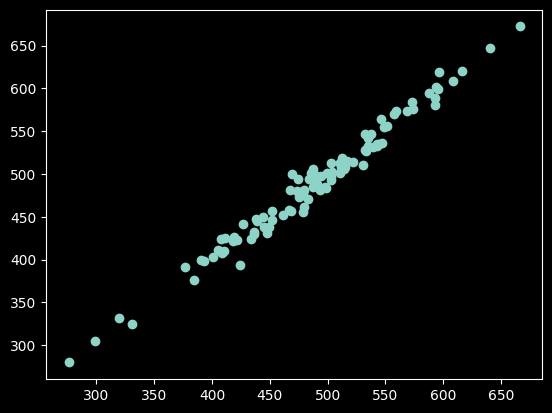

In [20]:
plt.scatter(y_test, y_test_preds)

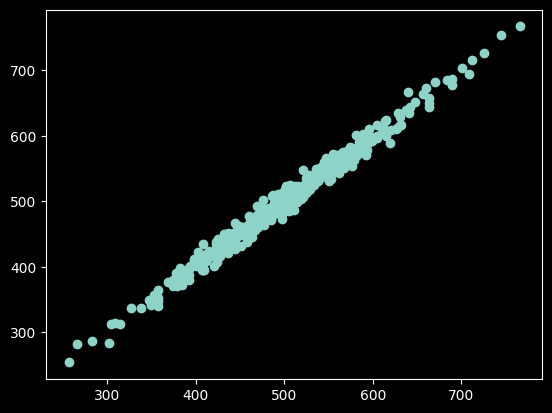

In [21]:
plt.scatter(y_train, y_train_preds)

In [22]:
from sklearn import metrics

In [23]:
metrics.explained_variance_score(y_test, y_test_preds)

0.9779115555030538

<Axes: ylabel='Density'>

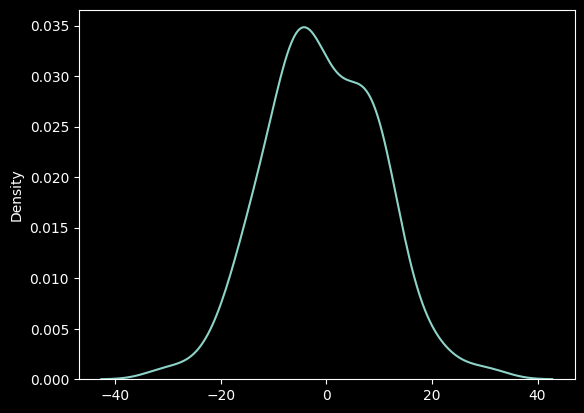

In [28]:
sns.kdeplot((y_test - y_test_preds))

<Axes: ylabel='Count'>

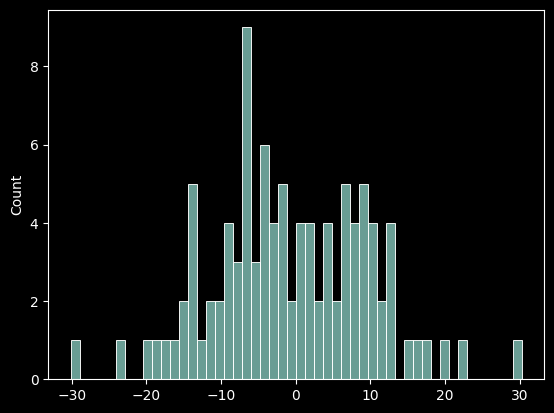

In [29]:
sns.histplot((y_test - y_test_preds), bins=50)

In [36]:
schema = read_yaml(SCHEMA).processed_data_columns

[2024-02-11 04:44:24 PM]:ProjectLogger INFO:basic_utils41 - yaml file: conf\schema.yaml loaded successfully


In [39]:
# Get the feature column names
feature_cols = list(schema.features)
feature_cols

['avg_session_length', 'time_on_app', 'time_on_website', 'membership_length']

In [42]:
cdf = pd.DataFrame(lr_model.coef_, feature_cols, columns=["Coefficients"])
cdf

,Coefficients
avg_session_length,25.250
time_on_app,38.704
time_on_website,0.315
membership_length,63.543


By analyzing the coefficients, we can say the following:

Keeping all the features fixed:
- one unit increase in `avg_session_length` is associated with the increase of **$25** of `annual_amount_spent`
- one unit increase in `time_on_app` is associated with the increase of **$39** of `annual_amount_spent`
- one unit increase in `time_on_website` is associated with the increase of **$0.3** of `annual_amount_spent`
- one unit increase in`membership_length` is associated with the increase of **$63** of `annual_amount_spent`

Therefore, there could be 2 options for the eCommerce company:
- They can work more UI/UX of website and easier spending options
- They can boost their mobile app